In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score


In [34]:
df = pd.read_csv("nursery_numerical.csv")

x_labels = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']
y_label = 'class'

In [35]:
df.columns

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'class'],
      dtype='object')

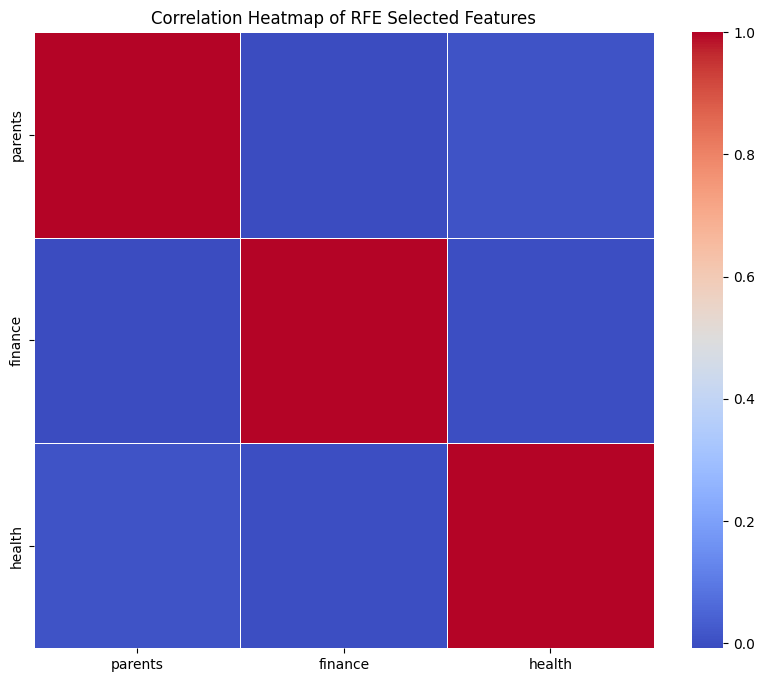

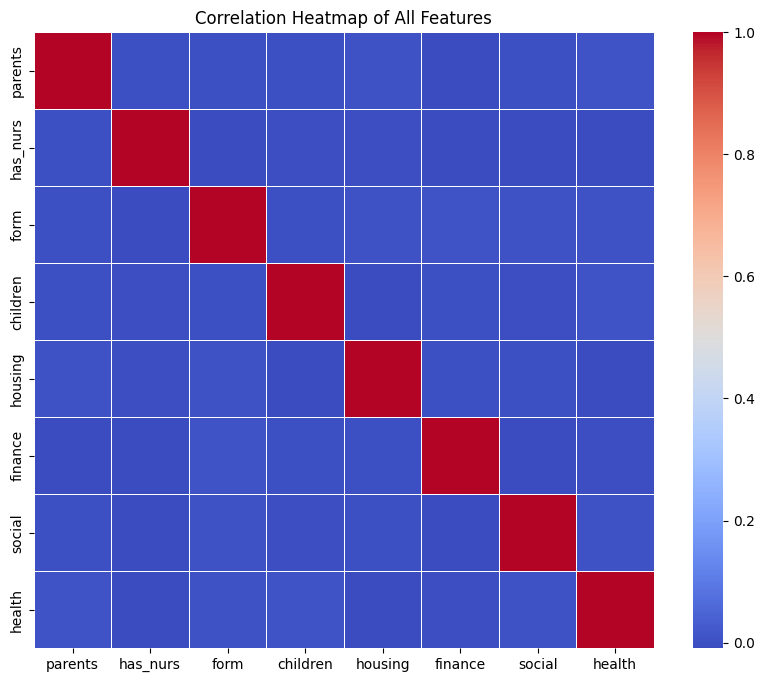

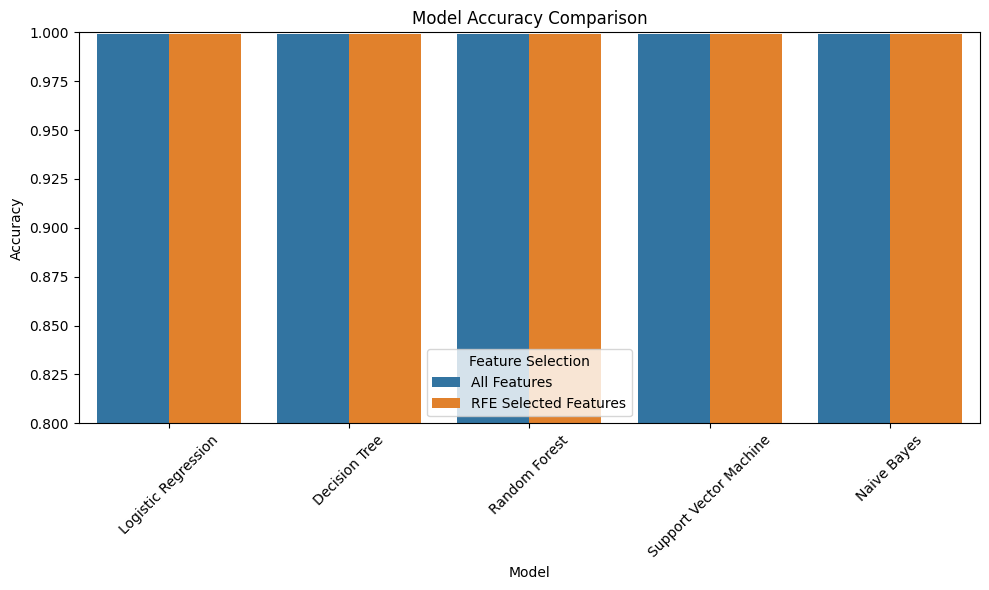

In [39]:
X = df[['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health']]
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create RFE object and specify the number of features to select
rfe = RFE(estimator=LogisticRegression(max_iter=10000), n_features_to_select=3)

# Fit RFE to training data (excluding the target variable)
rfe.fit(X_train, y_train)

# Transform the training and testing data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Convert selected features to DataFrame
df_selected_features = pd.DataFrame(X_train_selected, columns=[x_labels[i] for i, selected in enumerate(rfe.support_) if selected])

# Calculate correlation matrix for selected features
correlation_matrix_selected = df_selected_features.corr()

# Plot correlation heatmap for selected features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

df_all_features = pd.DataFrame(X_train, columns=x_labels)

# Calculate correlation matrix for all features
correlation_matrix_all = df_all_features.corr()

# Plot correlation heatmap for all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_all, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

random_seed = 42

# Define models with random seed
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, random_state=random_seed),
    "Decision Tree": DecisionTreeClassifier(random_state=random_seed),
    "Random Forest": RandomForestClassifier(random_state=random_seed),
    "Support Vector Machine": SVC(random_state=random_seed),
    "Naive Bayes": GaussianNB()
}

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Plotting
results_df = pd.DataFrame({
    "Model": list(results_all_features.keys()) + list(results_rfe_selected_features.keys()),
    "Accuracy": list(results_all_features.values()) + list(results_rfe_selected_features.values()),
    "Feature Selection": ['All Features'] * len(models) + ['RFE Selected Features'] * len(models)
})

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Model', y='Accuracy', hue='Feature Selection')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.legend(title='Feature Selection')
plt.tight_layout()
plt.show()


In [37]:
# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# Train and evaluate models with RFE-selected features
results_rfe_selected_features = {}
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    predictions = model.predict(X_test_selected)
    accuracy = accuracy_score(y_test, predictions)
    results_rfe_selected_features[name] = accuracy

# Print scores after RFE
print("\nScores with RFE-selected features:")
for name, accuracy in results_rfe_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

Scores with all features and without any added techniques:
Logistic Regression: 99.92%
Decision Tree: 99.92%
Random Forest: 99.92%
Support Vector Machine: 99.92%
Naive Bayes: 99.92%

Scores with RFE-selected features:
Logistic Regression: 99.92%
Decision Tree: 99.92%
Random Forest: 99.92%
Support Vector Machine: 99.92%
Naive Bayes: 99.92%
